In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

<b> Scenario: </b> A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

<b> Goal: </b> Evaluate A/B testing results and decide which marketing strategy works the best.

<b> Features of the dataset: </b>

- <b> MarketID: </b> unique identifier for market
- <b> MarketSize: </b> size of market area by sales
- <b> LocationID: </b> unique identifier for store location
- <b> AgeOfStore: </b> age of store in years
- <b> Promotion: </b> one of three promotions that were tested
- <b> week: </b> one of four weeks when the promotions were run
- <b> SalesInThousands: </b> sales amount for a specific LocationID, Promotion, and week 

<h2> Exploratory Data Analysis </h2>

In [2]:
df = pd.read_csv("WA_Marketing-Campaign.csv")
df.shape

(548, 7)

In [3]:
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [4]:
# check if there are any missing values
df.isnull().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

In [5]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


In [6]:
# number of uniqe markets
df.MarketID.nunique()

10

Text(0.5, 1.0, 'Box Plot')

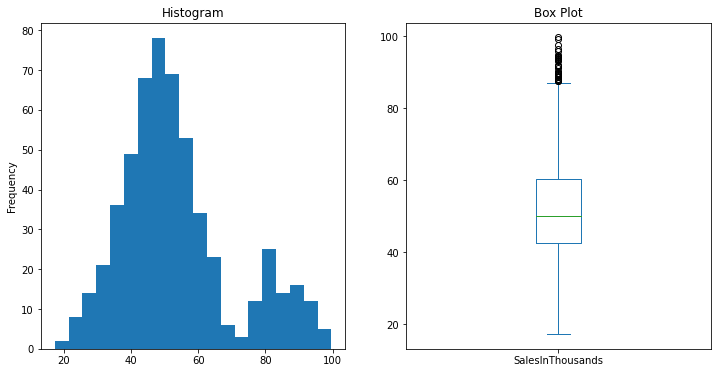

In [7]:
fig,ax = plt.subplots(1,2,figsize=(12,6))

(df
['SalesInThousands']
.plot.hist(ax=ax[0],bins=20)
)

ax[0].set_title("Histogram")

(df
['SalesInThousands']
.plot.box(ax=ax[1])
)

ax[1].set_title("Box Plot")

Text(0.5, 1.0, 'Marke Size Counts')

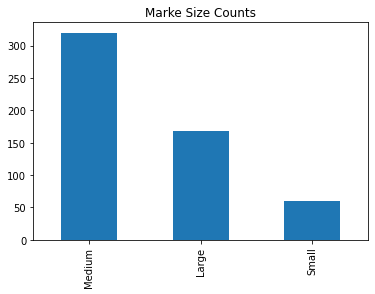

In [8]:
ax = (df
['MarketSize']
.value_counts()
.plot.bar()
)

ax.set_title("Marke Size Counts")

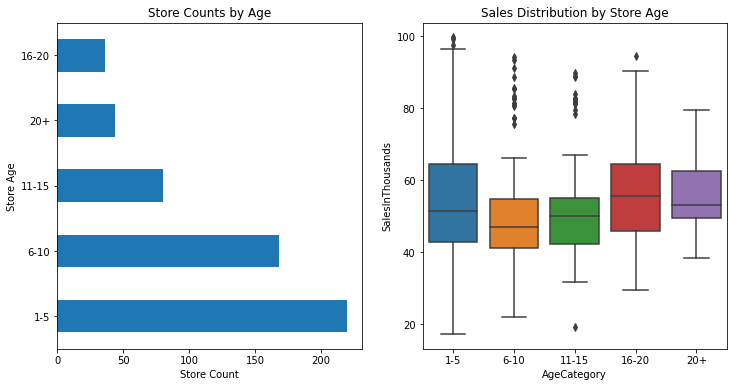

In [44]:
# categorize the age column
df['AgeCategory'] = pd.cut(df.AgeOfStore,[0,5,10,15,20,100],labels=['1-5','6-10','11-15','16-20','20+'])

# visaulize the age categorthe sales by age category
fig,ax = plt.subplots(1,2,figsize=(12,6))

(df
['AgeCategory']
.value_counts()
.plot.barh(ax=ax[0])
)

ax[0].set_title("Store Counts by Age")
ax[0].set_xlabel("Store Count")
ax[0].set_ylabel("Store Age")

sns.boxplot(ax=ax[1],data=df,x="AgeCategory",y="SalesInThousands")

_ = ax[1].set_title("Sales Distribution by Store Age")

<AxesSubplot:xlabel='MarketSize'>

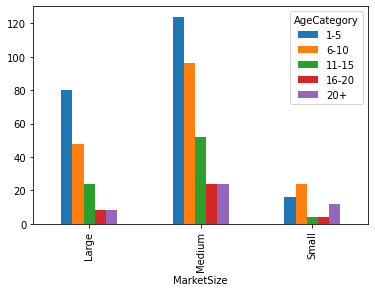

In [45]:
# store age and market size
(df
.groupby(['MarketSize','AgeCategory'])
.MarketID
.count()
.unstack()
.plot.bar()
)

Text(0.5, 1.0, 'Sales Distribuiton by Market Size')

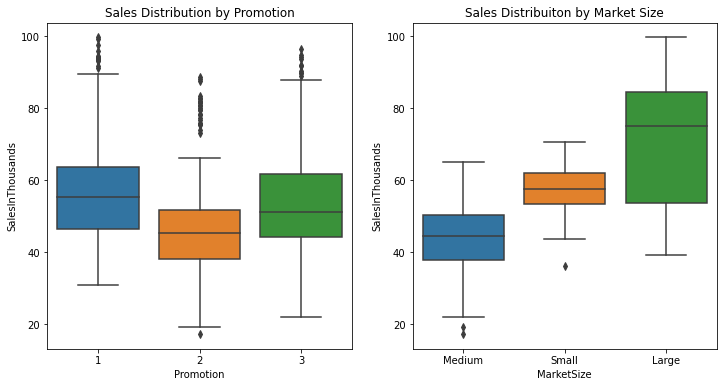

In [9]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

sns.boxplot(data=df,x="Promotion",y="SalesInThousands",ax=ax[0])
ax[0].set_title("Sales Distribution by Promotion")

sns.boxplot(data=df,x="MarketSize",y="SalesInThousands",ax=ax[1])
ax[1].set_title("Sales Distribuiton by Market Size")

It looks like Promotion 1 and Promotion 3 has done better job compared to Promotion 2 in terms of sales values, but the important question is that: <b> Is this difference statistically significant or cause of random chance? </b>

Large market size makes more sales. We should investigate if the campign is biased. For example, if Promotion 3 is more offered in large market sizes compared the other promotions, this could led to biased campaign. Below table shows that campaign is fair.

In [10]:
(df
.groupby(['Promotion','MarketSize'])
.aggregate(PromotionCount=('MarketID','count'))
.unstack()
.pipe(lambda df_ : df_.assign(Total=df_.sum(axis=1)))
#.plot.bar()
)

PromotionCount              Total
MarketSize          Large Medium Small      
Promotion                                   
1                      56     96    20   172
2                      64    108    16   188
3                      48    116    24   188

Also we can visaulize the below table to see more clearly.

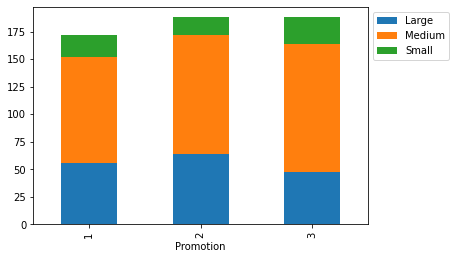

In [11]:
(df
.groupby(['Promotion','MarketSize'])
['MarketID']
.count()
.unstack()
.plot.bar(stacked=True)
.legend(bbox_to_anchor=(1,1))
)

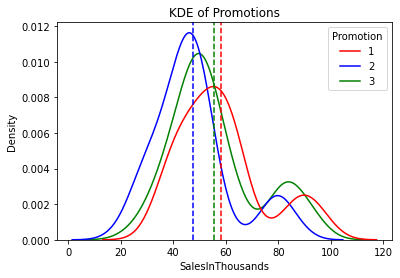

In [47]:
mean_1,mean_2,mean_3 = df.groupby("Promotion").SalesInThousands.mean()

ax = sns.kdeplot(data=df,x="SalesInThousands",hue="Promotion",palette=['red','blue','green'])
ax.axvline(mean_1, color='red', linestyle='--', label="mean1")
ax.axvline(mean_2, color='blue', linestyle='--')
ax.axvline(mean_3, color='green', linestyle='--')

_ = ax.set_title("KDE of Promotions")

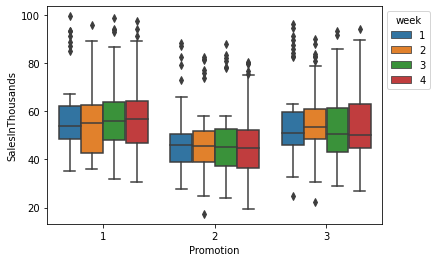

In [53]:
ax = sns.boxplot(data=df,x="Promotion",y="SalesInThousands",hue="week")
ax.legend(bbox_to_anchor=(1,1),title="week")

There is not much differences in sales weekly basis. It looks like for all the 3 promotion, sales are steady in weekly basis.

<h2> Hypothesis Testing </h2>

In [102]:
promotion_1 = df.query("Promotion == 1").SalesInThousands
promotion_2 = df.query("Promotion == 2").SalesInThousands
promotion_3 = df.query("Promotion == 3").SalesInThousands

Test the distribution of the data if it is normal or not. We can test it with by visualizing <b>qq plots</b> or applying <b>Shaphiro Wilks</b> test. Based on the normality of the data, we have to use different kind of distribution to test out hypothesis.

QQ plot shows that our data is not normally distributed. If data point scattered close enough to the diagonal line, we conclude that data is normally distributed.

Text(0.5, 1.0, 'QQ Plot for Promotion 3')

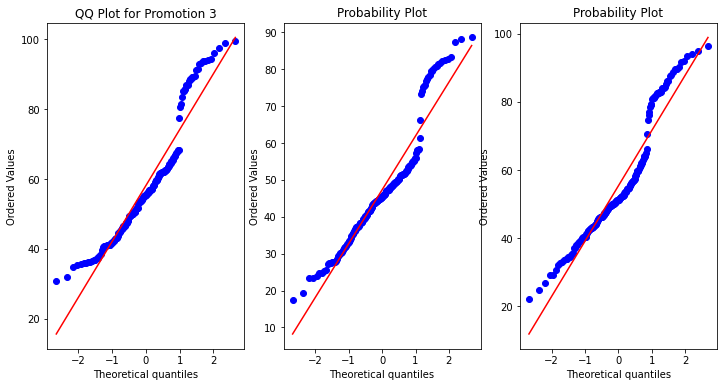

In [106]:
fig, ax = plt.subplots(1,3,figsize=(12,6))

_ = stats.probplot(promotion_1, plot=ax[0])
ax[0].set_title("QQ Plot for Promotion 1")

_ = stats.probplot(promotion_2, plot=ax[1])
ax[0].set_title("QQ Plot for Promotion 2")

_ = stats.probplot(promotion_3, plot=ax[2])
ax[0].set_title("QQ Plot for Promotion 3")

We can strengthen our conclusion by applying Shapiro test.

<b> Shaphiro Wilks Test: </b> Shapiro method conducts the following test:
- Null Hypothesis: Data is normally distributed.
- Alternative Hypothesis: Data is not normally distributed.

Based on the returned p-value, we reject the null hypothesis or not. If p-value smaller than 0.05(alpha value), we reject the null hypothesis and conclude that distribution is not normal.

In [108]:
_, pvalue_1 = stats.shapiro(promotion_1)
_, pvalue_2 = stats.shapiro(promotion_2)
_, pvalue_3 = stats.shapiro(promotion_3)

pvalue_1,pvalue_2,pvalue_3

(1.9773297665892642e-08, 5.456262108793908e-09, 1.499518376135711e-08)

Each p-value are much smaller than 0.05. Therefore, Shapiro Wilks Test indicated that data is not normally distributed.

Since data distribution is not normal, we have to use non-parametric test. One option could be using Mann-Whitney U test, but we have more than 2 test group so that we have to apply it pairwise(promotion1-promotion2,promotion1-promotion3,promotion2-promotion3). This is a little bit problematic because with each test, the chances are higher to get Type 1 Error(false positive). Since we have 3 test to apply, with alpha values 0.05 the chance of getting Type 1 Error equals to 1 - 0.95<sup>3</sup> = 0.143. Simply with each question, we are increasing the chance of being fooled by chance.

One solution to this promblem is that dividing the alpha value with the number of comparison. In our case this is equal to 0.05/3 = 0.0167. The other solution could be using Kruskal-Wallis H-test where you can test 2 or more distributions at the same. It is the non-parametic type of the ANOVA test. It tests if the medians of the distributions are the same or not, but in case the null hypothesis rejected, it can not say which group differs.

I want to try out the first solution, dividing the alpha value with the number of comparisons.

In [115]:
alpha = 0.05 / 3
alpha

0.016666666666666666

In [121]:
def test_hypothesis(dist1,dist2,nullh,alternativeh,alpha=0.05):
    """
    This function conducts hypothesis testing with the given null and alternative hypothesis by using Mann-Whitney U test.
    """

    print(f"NULL HYPOTHESIS: {nullh}")
    print(f"ALTERNATIVE HYPOTHESIS: {alternativeh}\n")

    _, pvalue = stats.mannwhitneyu(dist1,dist2)

    if pvalue > alpha:
        print(f"Null Hypothesis can not be rejected with the pvalue of {pvalue}.")
    else:
        print(f"Null Hypothesis is rejected in favor of Alternative Hypothesis with the pvalue of {pvalue}.")

In [122]:
null_hypo1 = "Promotion 1 and Promotion 2 is not different."
alt_hyp1 = "Promotion 1 and Promotion 2 is different."

test_hypothesis(promotion_1,promotion_2,null_hypo1,alt_hyp1,alpha)

NULL HYPOTHESIS: Promotion 1 and Promotion 2 is not different.
ALTERNATIVE HYPOTHESIS: Promotion 1 and Promotion 2 is different.

Null Hypothesis is rejected in favor of Alternative Hypothesis with the pvalue of 5.845935246838518e-12.


In [123]:
null_hypo2 = "Promotion 3 and Promotion 2 is not different."
alt_hyp2 = "Promotion 3 and Promotion 2 is different."

test_hypothesis(promotion_3,promotion_2,null_hypo2,alt_hyp2,alpha)

NULL HYPOTHESIS: Promotion 3 and Promotion 2 is not different.
ALTERNATIVE HYPOTHESIS: Promotion 3 and Promotion 2 is different.

Null Hypothesis is rejected in favor of Alternative Hypothesis with the pvalue of 1.1970084441651803e-07.


In [124]:
null_hypo3 = "Promotion 1 and Promotion 3 is not different."
alt_hyp3 = "Promotion 1 and Promotion 3 is different."

test_hypothesis(promotion_1,promotion_3,null_hypo2,alt_hyp2,alpha)

NULL HYPOTHESIS: Promotion 3 and Promotion 2 is not different.
ALTERNATIVE HYPOTHESIS: Promotion 3 and Promotion 2 is different.

Null Hypothesis can not be rejected with the pvalue of 0.035084095693231204.


<h2> Conclusion </h2>

<b> Based on the conducted experiments: </b>
- It has been satistically proven that Promotion 1 and Promotion 3 has done better job compared to Promotion 2 in the campaign.
- Although there is a small difference between Promotion 1 and Promotion 3, it is not statistically significant.
- Company can use either Promoiton 1 or Promotion 3.
- Also, company may consider to apply small changes in Promotion 1 or Promotion 3 and conduct more tests between the two.